In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [3]:
df = pd.read_csv(os.path.join("data", "train.csv"))
df_train = df[['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'AdoptionSpeed']]
df_train.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,AdoptionSpeed
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1,2
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1,3
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1,2
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1,2


In [9]:
y = df_train["AdoptionSpeed"]
target_names = ["0", "1", "2", "3", "4"]

In [10]:
X = df_train.drop("AdoptionSpeed", axis=1)
data.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity
0,2,3,299,0,1,1,7,0,1,1,2,2,2,1,1
1,2,1,265,0,1,1,2,0,2,2,3,3,3,1,1
2,1,1,307,0,1,2,7,0,2,2,1,1,2,1,1
3,1,4,307,0,2,1,2,0,2,1,1,1,2,1,1
4,1,1,307,0,1,1,0,0,2,1,2,2,2,1,1


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [15]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    

k: 1, Train/Test Score: 0.902/0.309
k: 3, Train/Test Score: 0.576/0.306
k: 5, Train/Test Score: 0.522/0.322
k: 7, Train/Test Score: 0.485/0.325
k: 9, Train/Test Score: 0.469/0.337
k: 11, Train/Test Score: 0.454/0.340
k: 13, Train/Test Score: 0.444/0.340
k: 15, Train/Test Score: 0.435/0.343
k: 17, Train/Test Score: 0.432/0.341
k: 19, Train/Test Score: 0.426/0.339
k: 21, Train/Test Score: 0.420/0.339
k: 23, Train/Test Score: 0.417/0.343
k: 25, Train/Test Score: 0.413/0.337
k: 27, Train/Test Score: 0.410/0.333
k: 29, Train/Test Score: 0.406/0.341
k: 31, Train/Test Score: 0.404/0.340
k: 33, Train/Test Score: 0.401/0.342
k: 35, Train/Test Score: 0.395/0.340
k: 37, Train/Test Score: 0.393/0.338
k: 39, Train/Test Score: 0.394/0.343
k: 41, Train/Test Score: 0.391/0.342
k: 43, Train/Test Score: 0.392/0.346
k: 45, Train/Test Score: 0.392/0.343
k: 47, Train/Test Score: 0.388/0.343
k: 49, Train/Test Score: 0.383/0.342


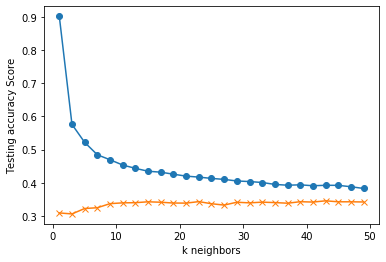

In [23]:
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [24]:
knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(X_train_scaled, y_train)
print('k=45 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=45 Test Acc: 0.343
